Temporal analysis on commuting flows between NYC counties from 24_02_2020 to 3_05_2020 from data weekly commuting dataset from article https://www.nature.com/articles/s41597-020-00734-5.
In particular, data are normalized with respect to the first week's data of each borough.

In [16]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as mpatches
import numpy as np
import matplotlib.ticker as ticker
import seaborn as sns

county_weekly_flows = pd.read_csv("/home/claudia/Scrivania/Tesi NYC pandemic /Weekly_flows/avg_weekly_flows_boroughs.csv")
county_weekly_flows.round(decimals=2);

GEOIDs for NYC Boroughs
Based on the ny17 dataset, we know the following information which will help us filter this dataset down to only the NYC boroughs. GEOIDs for NYC boroughs are as follows:

- New York County (Manhattan) - 36061
- Bronx County - 36005
- Kings County (Brooklyn) - 36047
- Queens County - 36081
- Richmond County (Staten Island) - 36085

In [44]:
weeks = ['24/02', '02/03', '09/03', '16/03', '23/03', '30/03', '06/04', '13/04', '20/04','27/04']
#dataframe for Manhattan as origin of the flow

Manhattan_weekly_flows_nn = county_weekly_flows.loc[(county_weekly_flows['geoid_o']==36061)] #not normalized
destination_id = Manhattan_weekly_flows_nn['geoid_d']
Manhattan_weekly_flows_nn.drop(columns=['geoid_o','pop_flows','geoid_d'], inplace = True)
man_w1 = Manhattan_weekly_flows_nn['avg_daily_flow_w1']
Manhattan_weekly_flows =  Manhattan_weekly_flows_nn.mul(1/man_w1, axis=0) #normalized on avg values of first week
Manhattan_weekly_flows.insert(0, "geoid_d", destination_id, True) 
#Manhattan_weekly_flows

/home/claudia/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


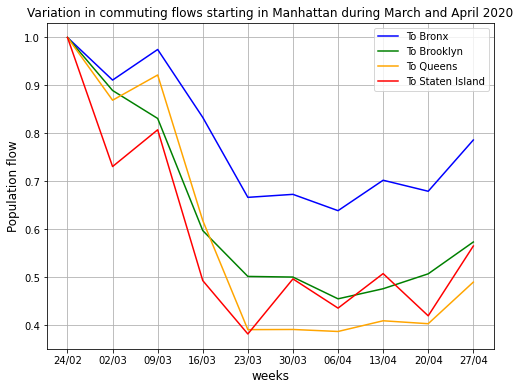

In [45]:
man_to_man = Manhattan_weekly_flows.loc[(Manhattan_weekly_flows['geoid_d']==36061)]
man_to_man.drop(columns=['geoid_d'], inplace=True)
man_to_bronx = Manhattan_weekly_flows.loc[(Manhattan_weekly_flows['geoid_d']==36005)]
man_to_bronx.drop(columns=['geoid_d'], inplace=True)
man_to_brook = Manhattan_weekly_flows.loc[(Manhattan_weekly_flows['geoid_d']==36047)]
man_to_brook.drop(columns=['geoid_d'], inplace=True)
man_to_quen = Manhattan_weekly_flows.loc[(Manhattan_weekly_flows['geoid_d']==36081)]
man_to_quen.drop(columns=['geoid_d'], inplace=True)
man_to_staten = Manhattan_weekly_flows.loc[(Manhattan_weekly_flows['geoid_d']==36085)]
man_to_staten.drop(columns=['geoid_d'], inplace=True)

plt.figure(figsize=(8,6))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('weeks', fontsize=12)
plt.ylabel('Population flow', fontsize=12)
plt.title('Variation in commuting flows starting in Manhattan during March and April 2020')
#line0 = plt.plot(weeks,man_to_man.iloc[0], linewidth=2, color='m')
line1,  = plt.plot(weeks,man_to_bronx.iloc[0], color='b', label ='To Bronx')
line2,  = plt.plot(weeks,man_to_brook.iloc[0], color='g', label='To Brooklyn')
line3,  = plt.plot(weeks,man_to_quen.iloc[0], color = 'Orange', label ='To Queens')
line4,  = plt.plot(weeks,man_to_staten.iloc[0], color='red', label = 'To Staten Island')
plt.legend(handles=[line1, line2, line3, line4], loc='upper right')
plt.grid()

/home/claudia/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


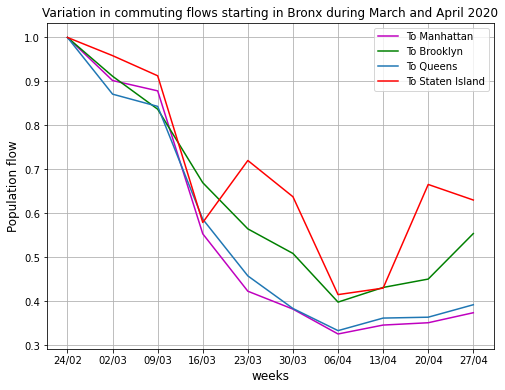

In [46]:
#dataframe for Bronx
Bronx_weekly_flows_nn = county_weekly_flows.loc[(county_weekly_flows['geoid_o']==36005)] #not normalized
destination_id = Bronx_weekly_flows_nn['geoid_d']
Bronx_weekly_flows_nn.drop(columns=['geoid_o','pop_flows', 'geoid_d'], inplace = True)
bronx_w1 = Bronx_weekly_flows_nn['avg_daily_flow_w1']
Bronx_weekly_flows = Bronx_weekly_flows_nn.mul(1/bronx_w1, axis=0) #normalized on avg values of first week 
Bronx_weekly_flows.insert(0, "geoid_d", destination_id, True)

bronx_to_man = Bronx_weekly_flows.loc[(Bronx_weekly_flows['geoid_d']==36061)]
bronx_to_man.drop(columns=['geoid_d'], inplace=True)
bronx_to_bronx = Bronx_weekly_flows.loc[(Bronx_weekly_flows['geoid_d']==36005)]
bronx_to_bronx.drop(columns=['geoid_d'], inplace=True)
bronx_to_brook = Bronx_weekly_flows.loc[(Bronx_weekly_flows['geoid_d']==36047)]
bronx_to_brook.drop(columns=['geoid_d'], inplace=True)
bronx_to_quen = Bronx_weekly_flows.loc[(Bronx_weekly_flows['geoid_d']==36081)]
bronx_to_quen.drop(columns=['geoid_d'], inplace=True)
bronx_to_staten = Bronx_weekly_flows.loc[(Bronx_weekly_flows['geoid_d']==36085)]
bronx_to_staten.drop(columns=['geoid_d'], inplace=True)

plt.figure(figsize=(8,6))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('weeks', fontsize=12)
plt.ylabel('Population flow', fontsize=12)
plt.title('Variation in commuting flows starting in Bronx during March and April 2020')
#line0 = plt.plot(weeks,man_to_man.iloc[0], linewidth=2, color='m')
line1b,  = plt.plot(weeks,bronx_to_man.iloc[0], color='m', label ='To Manhattan')
line2b,  = plt.plot(weeks,bronx_to_brook.iloc[0], color='g', label='To Brooklyn')
line3b,  = plt.plot(weeks,bronx_to_quen.iloc[0], label ='To Queens')
line4b,  = plt.plot(weeks,bronx_to_staten.iloc[0], color='red', label = 'To Staten Island')
plt.legend(handles=[line1b, line2b, line3b, line4b], loc='upper right')
plt.grid()

/home/claudia/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


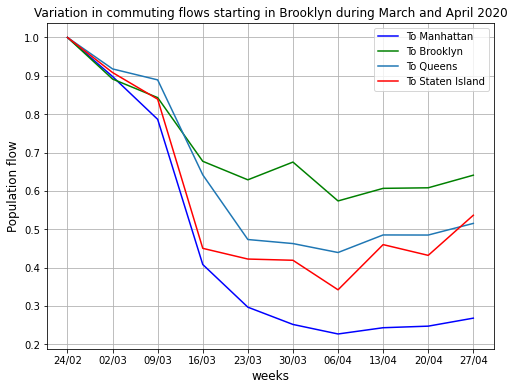

In [47]:
#dataframe for Brooklyn

Brook_weekly_flows_nn = county_weekly_flows.loc[(county_weekly_flows['geoid_o']==36047)] #not normalized
destination_id = Brook_weekly_flows_nn['geoid_d']
Brook_weekly_flows_nn.drop(columns=['geoid_o','pop_flows', 'geoid_d'], inplace = True)
brook_w1 = Brook_weekly_flows_nn['avg_daily_flow_w1']
Brook_weekly_flows = Brook_weekly_flows_nn.mul(1/brook_w1, axis=0) #normalized on avg values of first week 
Brook_weekly_flows.insert(0, "geoid_d", destination_id, True)

brook_to_man = Brook_weekly_flows.loc[(Brook_weekly_flows['geoid_d']==36061)]
brook_to_man.drop(columns=['geoid_d'], inplace=True)
brook_to_bronx = Brook_weekly_flows.loc[(Brook_weekly_flows['geoid_d']==36005)]
brook_to_bronx.drop(columns=['geoid_d'], inplace=True)
brook_to_brook = Brook_weekly_flows.loc[(Brook_weekly_flows['geoid_d']==36047)]
brook_to_brook.drop(columns=['geoid_d'], inplace=True)
brook_to_quen = Brook_weekly_flows.loc[(Brook_weekly_flows['geoid_d']==36081)]
brook_to_quen.drop(columns=['geoid_d'], inplace=True)
brook_to_staten = Brook_weekly_flows.loc[(Brook_weekly_flows['geoid_d']==36085)]
brook_to_staten.drop(columns=['geoid_d'], inplace=True)

plt.figure(figsize=(8,6))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('weeks', fontsize=12)
plt.ylabel('Population flow', fontsize=12)
plt.title('Variation in commuting flows starting in Brooklyn during March and April 2020')
#line0 = plt.plot(weeks,man_to_man.iloc[0], linewidth=2, color='m')
line1o,  = plt.plot(weeks,brook_to_man.iloc[0], color='blue', label ='To Manhattan')
line2o,  = plt.plot(weeks,brook_to_bronx.iloc[0], color='g', label='To Brooklyn')
line3o,  = plt.plot(weeks,brook_to_quen.iloc[0], label ='To Queens')
line4o,  = plt.plot(weeks,brook_to_staten.iloc[0], color='red', label = 'To Staten Island')
plt.legend(handles=[line1o, line2o, line3o, line4o], loc='upper right')
plt.grid()

/home/claudia/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


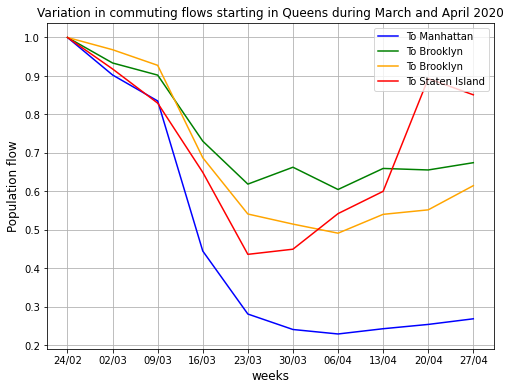

In [50]:
#dataframe for Queens
Queen_weekly_flows_nn = county_weekly_flows.loc[(county_weekly_flows['geoid_o']==36081)] #not normalized
destination_id = Queen_weekly_flows_nn['geoid_d']
Queen_weekly_flows_nn.drop(columns=['geoid_o','pop_flows', 'geoid_d'], inplace = True)
queen_w1 = Queen_weekly_flows_nn['avg_daily_flow_w1']
Queen_weekly_flows = Queen_weekly_flows_nn.mul(1/queen_w1, axis=0) #normalized on avg values of first week 
Queen_weekly_flows.insert(0, "geoid_d", destination_id, True)

queen_to_man = Queen_weekly_flows.loc[(Queen_weekly_flows['geoid_d']==36061)]
queen_to_man.drop(columns=['geoid_d'], inplace=True)
queen_to_bronx = Queen_weekly_flows.loc[(Queen_weekly_flows['geoid_d']==36005)]
queen_to_bronx.drop(columns=['geoid_d'], inplace=True)
queen_to_brook = Queen_weekly_flows.loc[(Queen_weekly_flows['geoid_d']==36047)]
queen_to_brook.drop(columns=['geoid_d'], inplace=True)
queen_to_queen = Queen_weekly_flows.loc[(Queen_weekly_flows['geoid_d']==36081)]
queen_to_queen.drop(columns=['geoid_d'], inplace=True)
queen_to_staten = Queen_weekly_flows.loc[(Queen_weekly_flows['geoid_d']==36085)]
queen_to_staten.drop(columns=['geoid_d'], inplace=True)

plt.figure(figsize=(8,6))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('weeks', fontsize=12)
plt.ylabel('Population flow', fontsize=12)
plt.title('Variation in commuting flows starting in Queens during March and April 2020')
#line0 = plt.plot(weeks,man_to_man.iloc[0], linewidth=2, color='m')
line1q,  = plt.plot(weeks,queen_to_man.iloc[0], color='blue', label ='To Manhattan')
line2q,  = plt.plot(weeks,queen_to_bronx.iloc[0], color='g', label='To Brooklyn')
line3q,  = plt.plot(weeks,queen_to_brook.iloc[0], color = 'Orange', label ='To Brooklyn')
line4q,  = plt.plot(weeks,queen_to_staten.iloc[0], color='red', label = 'To Staten Island')
plt.legend(handles=[line1q, line2q, line3q, line4q], loc='upper right')
plt.grid()

/home/claudia/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


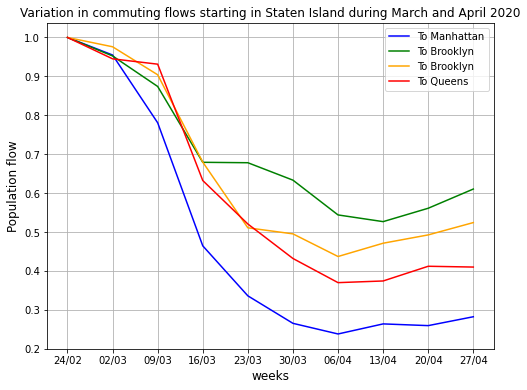

In [51]:
#dataframe for Staten Island

Stat_weekly_flows_nn = county_weekly_flows.loc[(county_weekly_flows['geoid_o']==36085)] #not normalized
destination_id = Stat_weekly_flows_nn['geoid_d']
Stat_weekly_flows_nn.drop(columns=['geoid_o','pop_flows', 'geoid_d'], inplace = True)
stat_w1 = Stat_weekly_flows_nn['avg_daily_flow_w1']
Stat_weekly_flows = Stat_weekly_flows_nn.mul(1/stat_w1, axis=0) #normalized on avg values of first week 
Stat_weekly_flows.insert(0, "geoid_d", destination_id, True)

stat_to_man = Stat_weekly_flows.loc[(Stat_weekly_flows['geoid_d']==36061)]
stat_to_man.drop(columns=['geoid_d'], inplace=True)
stat_to_bronx = Stat_weekly_flows.loc[(Stat_weekly_flows['geoid_d']==36005)]
stat_to_bronx.drop(columns=['geoid_d'], inplace=True)
stat_to_brook = Stat_weekly_flows.loc[(Stat_weekly_flows['geoid_d']==36047)]
stat_to_brook.drop(columns=['geoid_d'], inplace=True)
stat_to_quen = Stat_weekly_flows.loc[(Stat_weekly_flows['geoid_d']==36081)]
stat_to_quen.drop(columns=['geoid_d'], inplace=True)
stat_to_staten = Stat_weekly_flows.loc[(Stat_weekly_flows['geoid_d']==36085)]
stat_to_staten.drop(columns=['geoid_d'], inplace=True)

plt.figure(figsize=(8,6))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('weeks', fontsize=12)
plt.ylabel('Population flow', fontsize=12)
plt.title('Variation in commuting flows starting in Staten Island during March and April 2020')
#line0 = plt.plot(weeks,man_to_man.iloc[0], linewidth=2, color='m')
line1s,  = plt.plot(weeks,stat_to_man.iloc[0], color='blue', label ='To Manhattan')
line2s,  = plt.plot(weeks,stat_to_bronx.iloc[0], color='g', label='To Brooklyn')
line3s,  = plt.plot(weeks,stat_to_brook.iloc[0], color= 'Orange', label ='To Brooklyn')
line4s,  = plt.plot(weeks,stat_to_quen.iloc[0], color='red', label = 'To Queens')
plt.legend(handles=[line1s, line2s, line3s, line4s], loc='upper right')
plt.grid()

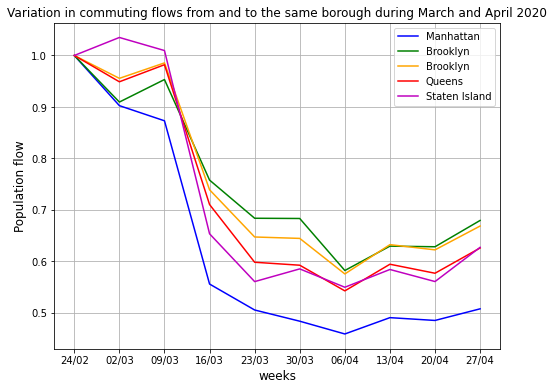

In [53]:
#plot for commuting from and to the same borough
plt.figure(figsize=(8,6))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('weeks', fontsize=12)
plt.ylabel('Population flow', fontsize=12)
plt.title('Variation in commuting flows from and to the same borough during March and April 2020')

line1p,  = plt.plot(weeks,man_to_man.iloc[0], color='blue', label ='Manhattan')
line2p,  = plt.plot(weeks,bronx_to_bronx.iloc[0], color='g', label='Brooklyn')
line3p,  = plt.plot(weeks,brook_to_brook.iloc[0], color = 'Orange', label ='Brooklyn')
line4p,  = plt.plot(weeks,queen_to_queen.iloc[0], color='red', label = 'Queens')
line5p,  = plt.plot(weeks,stat_to_staten.iloc[0], color = 'm', label = 'Staten Island')
plt.legend(handles=[line1p, line2p, line3p, line4p, line5p], loc='upper right')
plt.grid()

Commuting towards Manhattan has the highest slope, i.e. a larger number of commuters stopped their trips toward this county with respect to the others.